# Swan Teleco - Customer Retention Marketing  - Project 📈
### Team:  Customer Guardians

In this project, our aim was to create a data-driven understanding of customer churn to improve retention strategies for Swan Teleco.

We analysed customer demographics, identifying key characteristics of churners and the factors influencing their decisions. We also aimed to provide the new customer team with insights into the most desirable customer profiles to maximise retention and identified a suitable incentive to encourage sign-ups for specific products.
 
Finally, we developed a system to assess the churn risk of all remaining customers, enabling the customer service team to proactively address potential attrition.

# Importation

## Libraries / Modules

In [1]:
## Import the libraries/modules

# For core data and visualisations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For data splitting, scaling and measuring
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn import metrics

# For modelling
from sklearn.linear_model import LogisticRegression

## Data

In [2]:
## Read the dataset

customers = pd.read_csv("https://raw.githubusercontent.com/IsabelleRaj/Swan-Consulting/refs/heads/main/1%20-%20Project%20Data.csv")

In [3]:
## Display all the columns

pd.set_option("display.max_columns", None)

In [4]:
## Preview the first few rows of the dataframe

customers.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


# Initial Data Checking

In [5]:
## Preview the info of the dataframe

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

Considerable amount of null values with "Churn Reason". Consideration of dropping this feature when it comes to modelling

In [6]:
## Check for null values

print(f"Number of null records: {customers.isnull().sum().sum()}")
customers.isnull().sum()

Number of null records: 5174


CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64

In [7]:
## Check for zero values

print("Number of zero records = ", ((customers== 0).sum().sum()), "\n")
(customers == 0).sum()

Number of zero records =  5185 



CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months          11
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value          5174
Churn Reason            0
dtype: int64

11 records of zero values within the "Tenure Months" feature. Further exploration on this after train/test split will be conducted, to mitigate data leakage.

In [8]:
## Check for duplicates

print(f"Number of duplicate records: {customers.duplicated().sum()}")

Number of duplicate records: 0


# Train/Test Split

In [9]:
## Seperate features and target for train/test splitting

# Split the target from the columns
feature_cols = list(customers.columns)
feature_cols.remove('Churn Value')

# Create X (features), and y (target) variables.
X = customers[feature_cols]
y = customers['Churn Value']

In [10]:
## Train/Test split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [11]:
## Check that the number of records between X and y (across Train and Test) both match

print(f"X_train:   {X_train.shape}\ny_train:   {y_train.shape}\n")
print(f"X_test:    {X_test.shape}\ny_test:    {y_test.shape}")

X_train:   (5634, 30)
y_train:   (5634,)

X_test:    (1409, 30)
y_test:    (1409,)


In [12]:
## Check if number of indexes are equal between train and test split

print(f"Train index split matching:   {all(X_train.index == y_train.index)}")
print(f"Test index split matching:    {all(X_test.index == y_test.index)}")

Train index split matching:   True
Test index split matching:    True


# Exploratory Data Analysis (EDA)

In [13]:
## Create a dataframe of the train data

# Copy the features dataframe
customers_train = X_train.copy()

# Add the target column
customers_train['Churn Value'] = y_train

In [14]:
## Preview the first few rows of the dataframe

customers_train.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Reason,Churn Value
3717,6061-GWWAV,1,United States,California,Fresno,93726,"36.793601, -119.761131",36.793601,-119.761131,Male,No,No,Yes,41,Yes,No,DSL,Yes,Yes,Yes,No,Yes,No,One year,No,Mailed check,70.20,2894.55,No,NaN,0
6143,8464-EETCQ,1,United States,California,Salinas,93905,"36.667794, -121.601306",36.667794,-121.601306,Male,No,No,No,57,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.80,1094.35,No,NaN,0
5643,7621-VPNET,1,United States,California,Arcadia,91006,"34.137319, -118.029837",34.137319,-118.029837,Female,No,Yes,No,42,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),85.90,3729.75,No,NaN,0
69,6432-TWQLB,1,United States,California,Rosemead,91770,"34.065108, -118.082791",34.065108,-118.082791,Male,No,Yes,No,5,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,Yes,Electronic check,85.40,401.1,Yes,Network reliability,1
2863,4102-HLENU,1,United States,California,Auburn,95603,"38.912881, -121.082766",38.912881,-121.082766,Female,No,Yes,No,67,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,Two year,No,Mailed check,65.65,4322.85,No,NaN,0


In [15]:
## Summary statistics

customers_train.describe(include = 'all')

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Reason,Churn Value
count,5634,5634.0,5634,5634,5634,5634.000000,5634,5634.000000,5634.000000,5634,5634,5634,5634,5634.000000,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634,5634.000000,5634,5634,1495,5634.000000
unique,5634,NaN,1,1,1129,NaN,1652,NaN,NaN,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,5260,2,20,NaN
top,1794-SWWKL,NaN,United States,California,Los Angeles,NaN,"34.001617, -118.222274",NaN,NaN,Male,No,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No,Attitude of support person,NaN
freq,1,NaN,5634,5634,243,NaN,5,NaN,NaN,2828,4706,2928,4332,NaN,5089,2733,2436,2778,2465,2486,2819,2261,2226,3126,3333,1878,NaN,11,4139,159,NaN
mean,NaN,1.0,NaN,NaN,NaN,93534.861555,NaN,36.300292,-119.813768,NaN,NaN,NaN,NaN,32.096912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.365735,NaN,NaN,NaN,0.265353
std,NaN,0.0,NaN,NaN,NaN,1868.329776,NaN,2.459752,2.153494,NaN,NaN,NaN,NaN,24.510609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.079021,NaN,NaN,NaN,0.441560
min,NaN,1.0,NaN,NaN,NaN,90001.000000,NaN,32.555828,-124.301372,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,NaN,0.000000
25%,NaN,1.0,NaN,NaN,NaN,92103.000000,NaN,34.037037,-121.827673,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.100000,NaN,NaN,NaN,0.000000
50%,NaN,1.0,NaN,NaN,NaN,93562.000000,NaN,36.444232,-119.761131,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.025000,NaN,NaN,NaN,0.000000
75%,NaN,1.0,NaN,NaN,NaN,95359.500000,NaN,38.240419,-118.053753,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.750000,NaN,NaN,NaN,1.000000


## Handling Zero Values

In [16]:
## ## Check for zero values

print("Number of zero records = ", ((customers_train== 0).sum().sum()), "\n")
(customers_train == 0).sum()

Number of zero records =  4148 



CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           9
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Reason            0
Churn Value          4139
dtype: int64

3 records have been split into the test data set. Meaning our method of addressing these will be included within the feature engineering process.

In [17]:
## Preview the zero value records

customers_train[customers_train["Tenure Months"] == 0]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Reason,Churn Value
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,NaN,0
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,NaN,0
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,NaN,0
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,NaN,0
6840,2775-SEFEE,1,United States,California,Wilmington,90744,"33.782068, -118.262263",33.782068,-118.262263,Male,No,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No,NaN,0
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,NaN,0
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,NaN,0
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,NaN,0
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,NaN,0


"Tenure Months" represents how long a customer has been with Swan Telecom. New customers in their first month are indicated by a "Tenure Months" value of zero. 

Following from this, we found that some customers have empty strings listed for their "Total Charges". This "Total Charges" field is approximately calculated by multiplying "Monthly Charges" by "Tenure Months". 

To address this, we will replace these empty strings with the calculated "Total Charges", in the feature engineering process.

## Correlation Matrix

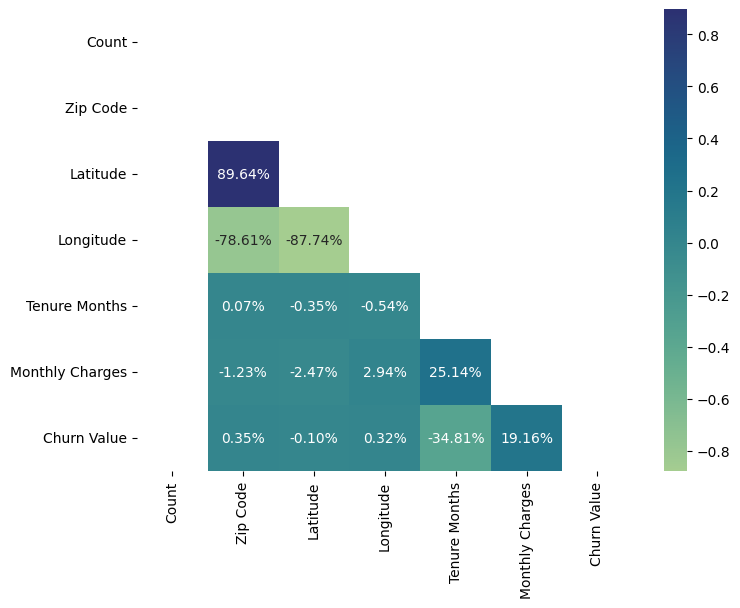

In [18]:
## Visualise the correlations

# Calculate the correlation between each numerical column 
customers_train_corr = customers_train.corr(numeric_only = True)

# Plot size
plt.figure(figsize=(8, 6))

# Heatmap of the correlations
sns.heatmap(data= customers_train_corr,
            annot= True,
            mask= np.triu(customers_train_corr),
            fmt= ".2%",
            cmap= "crest")

# Hide the axes
plt.show()

## Visualising the relationship: Scatterplot

<Figure size 800x800 with 0 Axes>

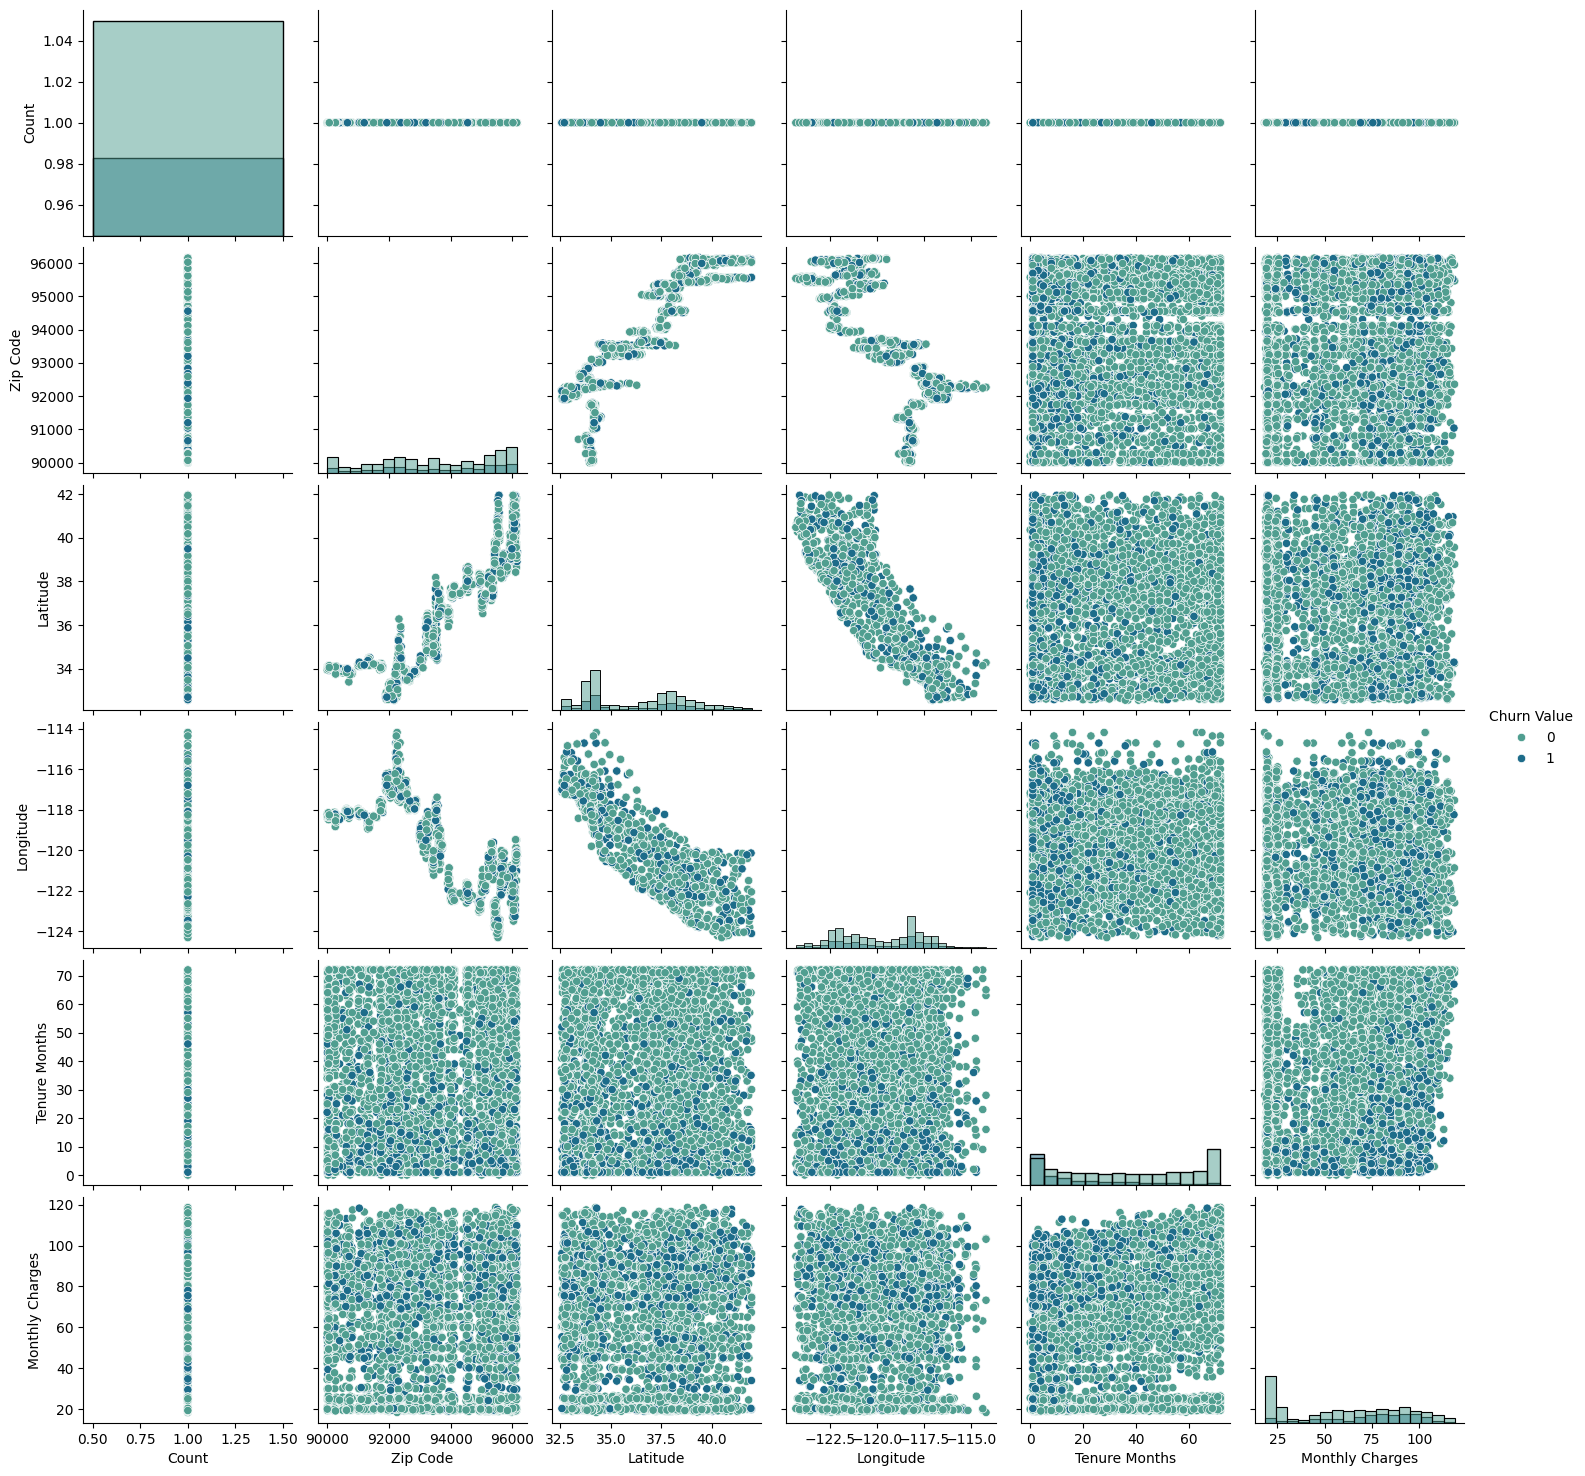

In [19]:
## Pairplot of all numeric features

# Plot size
plt.figure(figsize = (8, 8))

# Pairplot
sns.pairplot(data= customers_train,
             hue= 'Churn Value',
             palette= 'crest',
             diag_kind= 'hist')

# Hide the axes
plt.show()

## Distribution of Figures

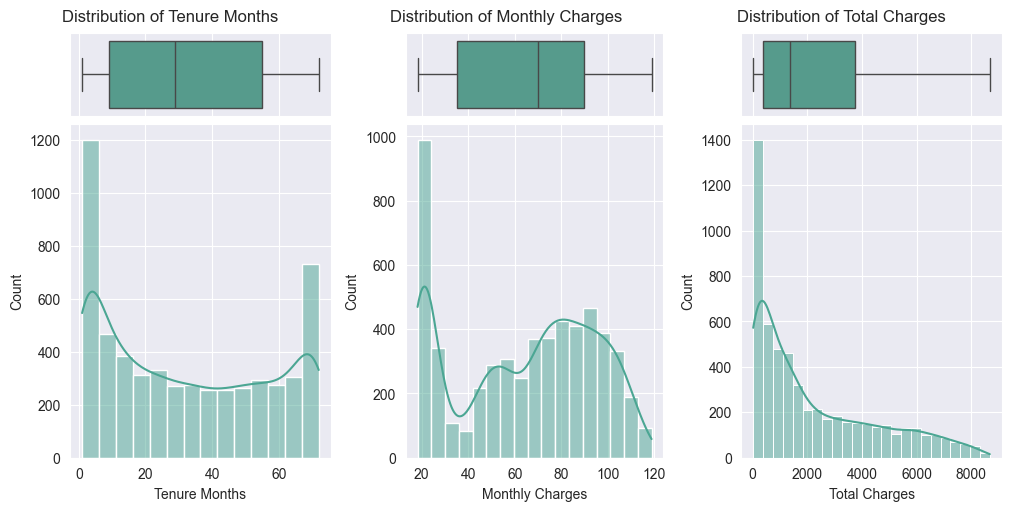

In [85]:
## Plot the distributions of the numerical continous features

# Remove rows with an empty string in total charges and change datatype 
customers_train_dist = customers_train[customers_train['Total Charges'].str.strip() != ""].copy()
customers_train_dist['Total Charges'] = customers_train_dist['Total Charges'].astype(float)

# List of the features to plot
columns_to_plot = ['Tenure Months','Monthly Charges','Total Charges']

# Create subfigures (outer grid) (one for each feature)
fig = plt.figure(layout='constrained', figsize=(10, 5))
subfigs = fig.subfigures(1, 3) # 1 row and 3 columns

# Flatten to allow us to loop through it/easier indexing
subfigs = subfigs.flat

# Loop through each feature and the corresponding subfigure simultaneously:
for subfig, column in zip(subfigs, columns_to_plot):
    # Give a title to the subfigure
    subfig.suptitle(f'Distribution of {column}', fontsize = 12)
    
    # Create two subplots in the subfigure (inner grid)
    axs = subfig.subplots(2, 1, gridspec_kw={"height_ratios": [0.2, 0.8]}, sharex = True) # Ratio of 0.2:0.8 for the subplots
    
    # Plot a boxplot on the smaller subplot
    sns.boxplot(customers_train_dist[column], orient="h", ax=axs[0], color = '#4ba693') # Color to match crest palette
    
    # Plot a histogram on the larger subplot
    sns.histplot(customers_train_dist[column], kde=True, ax=axs[1], color = '#4ba693')


# Display the plot
plt.show()

## Churned Customer Demographic

In [21]:
## Create a dataframe of the train data of churned customers

customers_churned = customers[customers['Churn Value'] == 1].copy()

In [22]:
## Preview the info of the dataframe

customers_churned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1869 entries, 0 to 1868
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1869 non-null   object 
 1   Count              1869 non-null   int64  
 2   Country            1869 non-null   object 
 3   State              1869 non-null   object 
 4   City               1869 non-null   object 
 5   Zip Code           1869 non-null   int64  
 6   Lat Long           1869 non-null   object 
 7   Latitude           1869 non-null   float64
 8   Longitude          1869 non-null   float64
 9   Gender             1869 non-null   object 
 10  Senior Citizen     1869 non-null   object 
 11  Partner            1869 non-null   object 
 12  Dependents         1869 non-null   object 
 13  Tenure Months      1869 non-null   int64  
 14  Phone Service      1869 non-null   object 
 15  Multiple Lines     1869 non-null   object 
 16  Internet Service   1869 non-n

In [23]:
## Summary statistics

customers_churned.describe(include= 'all')

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
count,1869,1869.0,1869,1869,1869,1869.000000,1869,1869.000000,1869.000000,1869,1869,1869,1869,1869.000000,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869.000000,1869,1869,1869.0,1869
unique,1869,NaN,1,1,833,NaN,1190,NaN,NaN,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,1732,1,NaN,20
top,8361-LTMKD,NaN,United States,California,Los Angeles,NaN,"34.066367, -118.309868",NaN,NaN,Female,No,No,No,NaN,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,Yes,NaN,Attitude of support person
freq,1,NaN,1869,1869,90,NaN,5,NaN,NaN,939,1393,1200,1763,NaN,1699,850,1297,1461,1233,1211,1446,942,938,1655,1400,1071,NaN,6,1869,NaN,192
mean,NaN,1.0,NaN,NaN,NaN,93532.352595,NaN,36.268614,-119.782388,NaN,NaN,NaN,NaN,17.979133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.441332,NaN,NaN,1.0,NaN
std,NaN,0.0,NaN,NaN,NaN,1858.939970,NaN,2.473911,2.163024,NaN,NaN,NaN,NaN,19.531123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.666053,NaN,NaN,0.0,NaN
min,NaN,1.0,NaN,NaN,NaN,90001.000000,NaN,32.555828,-124.301372,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.850000,NaN,NaN,1.0,NaN
25%,NaN,1.0,NaN,NaN,NaN,92105.000000,NaN,34.038983,-121.799917,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.150000,NaN,NaN,1.0,NaN
50%,NaN,1.0,NaN,NaN,NaN,93554.000000,NaN,36.298780,-119.711868,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.650000,NaN,NaN,1.0,NaN
75%,NaN,1.0,NaN,NaN,NaN,95358.000000,NaN,38.200231,-118.020188,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.200000,NaN,NaN,1.0,NaN


### Customer Summary

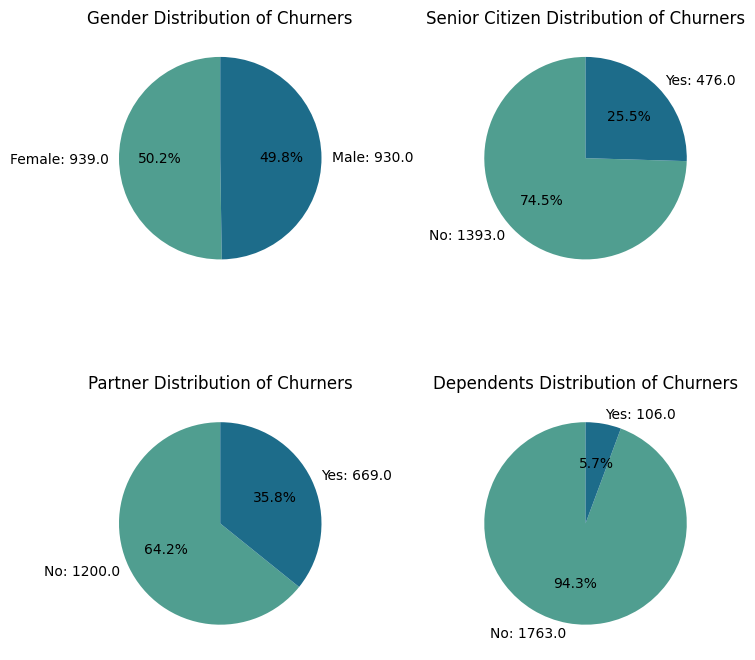

In [24]:
## Process for visualisation

# Create demographic feature column objects
gender_dist = customers_churned['Gender'].value_counts()
partner_dist = customers_churned['Partner'].value_counts()
dependents_dist = customers_churned['Dependents'].value_counts()
senior_citizen_dist = customers_churned['Senior Citizen'].value_counts()

# Combine them into a single DataFrame
df_demographuic = pd.DataFrame({
    'Gender': gender_dist,
    'Senior Citizen': senior_citizen_dist,
    'Partner': partner_dist,
    'Dependents': dependents_dist})

# Fill features with null values with 0
df_demographuic = df_demographuic.fillna(0)

# Ensure consistent ordering for plot
df_demographuic = df_demographuic[['Gender', 'Senior Citizen', 'Partner', 'Dependents']]

# Function to plot pie chart with labels and percentages
def plot_pie_chart(data, title, ax):

  # Get labels and values for display
  labels = data.index
  sizes = data.values
  value = [f'{label}: {size:.1f}' for label, size in zip(labels, sizes)]
  colors = sns.color_palette("crest", len(data))

  # Plot pie chart with actual values and percentages as autopct
  ax.pie(sizes, labels= value, autopct= '%1.1f%%', startangle= 90, colors= colors)
  ax.set_title(title)

# Create a figure and set of subplots (2 rows, 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.tight_layout(pad=5.0)

# Pie chart for Gender
plot_pie_chart(gender_dist, 'Gender Distribution of Churners', axs[0, 0])

# Pie chart for Senior Citizen
plot_pie_chart(senior_citizen_dist, 'Senior Citizen Distribution of Churners', axs[0, 1])

# Pie chart for Partner Status
plot_pie_chart(partner_dist, 'Partner Distribution of Churners', axs[1, 0])

# Pie chart for Dependents Status
plot_pie_chart(dependents_dist, 'Dependents Distribution of Churners', axs[1, 1])

# Show the plots
plt.show()

### Leading Reasoning for Customer Churning

In [25]:
## Identifying the leading churn reasoning as percentage

print("Identifying the leading churn reasoning as percentage:")
round(customers_churned['Churn Reason'].value_counts(normalize = True),4)*100

Identifying the leading churn reasoning as percentage:


Churn Reason
Attitude of support person                   10.27
Competitor offered higher download speeds    10.11
Competitor offered more data                  8.67
Don't know                                    8.24
Competitor made better offer                  7.49
Attitude of service provider                  7.22
Competitor had better devices                 6.96
Network reliability                           5.51
Product dissatisfaction                       5.46
Price too high                                5.24
Service dissatisfaction                       4.76
Lack of self-service on Website               4.71
Extra data charges                            3.05
Moved                                         2.84
Lack of affordable download/upload speed      2.35
Limited range of services                     2.35
Long distance charges                         2.35
Poor expertise of phone support               1.07
Poor expertise of online support              1.02
Deceased          

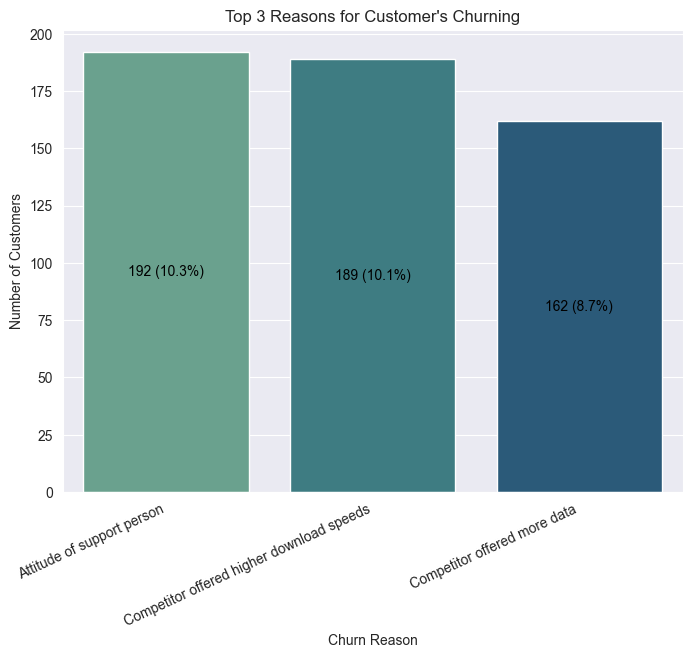

In [26]:
## Process for visualisation

# Create churn reason object
churn_reason = [{'Churn Reason': 'Attitude of support person', 'Number of Customers': 192, 'Percentage of Customers': 10.3},
                {'Churn Reason': 'Competitor offered higher download speeds', 'Number of Customers': 189, 'Percentage of Customers': 10.1},
                {'Churn Reason': 'Competitor offered more data', 'Number of Customers': 162, 'Percentage of Customers': 8.7}]

# Create dataframe
df_churn_reason = pd.DataFrame(churn_reason)
df_churn_reason


# Set the width,height sizes for the plot
plt.figure(figsize = (8,6))

# Set a style
sns.set_style("darkgrid")

# Plot the barplot
ax = sns.barplot(data = df_churn_reason,
            x = 'Churn Reason',
            y = 'Number of Customers',
            palette = 'crest',
            hue = 'Churn Reason')

# Adjust the x-axis labels
plt.xticks(rotation= 25, 
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'medium')

# Give a title
plt.title('Top 3 Reasons for Customer\'s Churning')


# Add both customer count and percentage as labels
# Create combined labels for each bar
labels = [f"{c} ({p}%)" for c, p in zip(df_churn_reason['Number of Customers'], df_churn_reason['Percentage of Customers'])]

# Add the combined labels to the bars
for container, label in zip(ax.containers, labels):
    ax.bar_label(container, labels=[label], label_type='center', fontsize=10, color='black')
    
# Show the plot
plt.show()

### Products

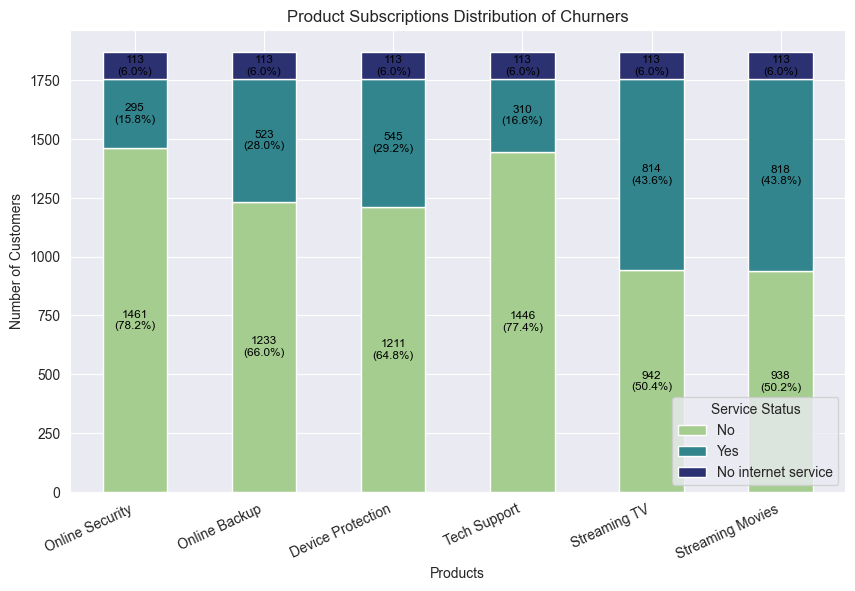

In [92]:
## Process for visualisation

# Product data accumilation
product_data = {
    'Online Security': {'No': 1461, 'Yes': 295, 'No internet service': 113},
    'Online Backup': {'No': 1233, 'Yes': 523, 'No internet service': 113},
    'Device Protection': {'No': 1211, 'Yes': 545, 'No internet service': 113},
    'Tech Support': {'No': 1446, 'Yes': 310, 'No internet service': 113},
    'Streaming TV': {'No': 942, 'Yes': 814, 'No internet service': 113},
    'Streaming Movies': {'No': 938, 'Yes': 818, 'No internet service': 113}}

# Create a DataFrame
df_products = pd.DataFrame(product_data)

# Transpose the DataFrame for easier plotting
df_transposed = df_products.T

# Function to calculate the percentages
def perc_calc(row):
    row['Perc_No'] = round(row['No'] / (row['No'] + row['Yes'] + row['No internet service']) * 100,1)
    row['Perc_Yes'] = round(row['Yes'] / (row['No'] + row['Yes'] + row['No internet service']) * 100,1)
    row['Perc_No internet service'] = round(row['No internet service'] / (row['No'] + row['Yes'] + row['No internet service']) * 100,1)
    return row

# Apply the function row-wise
df_transposed = df_transposed.apply(perc_calc, axis=1)

# Convert datatype
df_transposed[['No', 'Yes', 'No internet service']] = df_transposed[['No', 'Yes', 'No internet service']].astype(int)

# Create the stacked bar plot
ax = df_transposed[['No', 'Yes', 'No internet service']].plot(kind='bar', stacked=True, figsize=(10, 6), colormap= 'crest')

# Customise the plot
plt.xlabel('Products')
plt.ylabel('Number of Customers')
plt.title('Product Subscriptions Distribution of Churners')
plt.legend(title='Service Status', loc= "lower right")

# Adjust the x-axis labels
plt.xticks(rotation= 25, 
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'medium')

# Add annotations/labels for each bar
for col, container in zip(['No', 'Yes', 'No internet service'], ax.containers): # Loop through the containers (each product bar) and relevant columns
    # Create a label combining the count and percentage for each column
    labels = [f"""{count}\n({perc}%)""" for count, perc in zip(df_transposed[col], df_transposed[f"Perc_{col}"])]
    # Plot the label for each container i.e., each product/bar 
    ax.bar_label(container, labels=labels, label_type='center', fontsize=8.5, color='black')

# Show the plot
plt.show()

### a

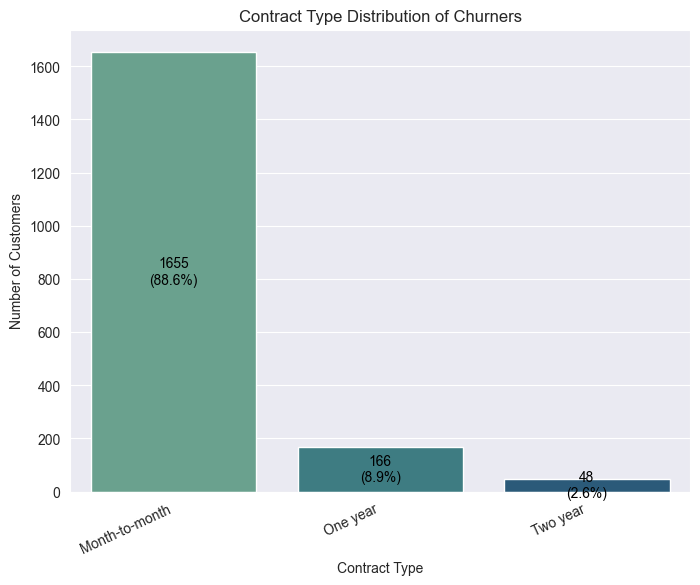

In [80]:
## Plot the internet service distribution as a barplot

# Create a dataframe for internet service counts
contract = [{'Contract Type': 'Month-to-month', 'Number of Customers': 1655, 'Percentage of Customers': 88.6},
            {'Contract Type': 'One year', 'Number of Customers': 166, 'Percentage of Customers': 8.9},
            {'Contract Type': 'Two year', 'Number of Customers': 48, 'Percentage of Customers': 2.6}]

df_contract = pd.DataFrame(contract)
df_contract

# Set the width,height sizes for the plot
plt.figure(figsize = (8,6))

# Set a style
sns.set_style("darkgrid")

# Plot the barplot
ax = sns.barplot(data = df_contract,
                 x = 'Contract Type',
                 y = 'Number of Customers',
                 palette = 'crest',
                 hue = 'Contract Type')

# Adjust the x-axis labels
plt.xticks(rotation= 25, 
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'medium')

# Give a title
plt.title('Contract Type Distribution of Churners')

# Add both customer count and percentage as labels
# Create combined labels for each bar
labels = [f"{c}\n({p}%)" for c, p in zip(df_contract['Number of Customers'], df_contract['Percentage of Customers'])]

# Add the combined labels to the bars
for container, label in zip(ax.containers, labels):
    ax.bar_label(container, labels=[label], label_type='center', fontsize=10, color='black')
    
# Show the plot
plt.show()

### Internet Service

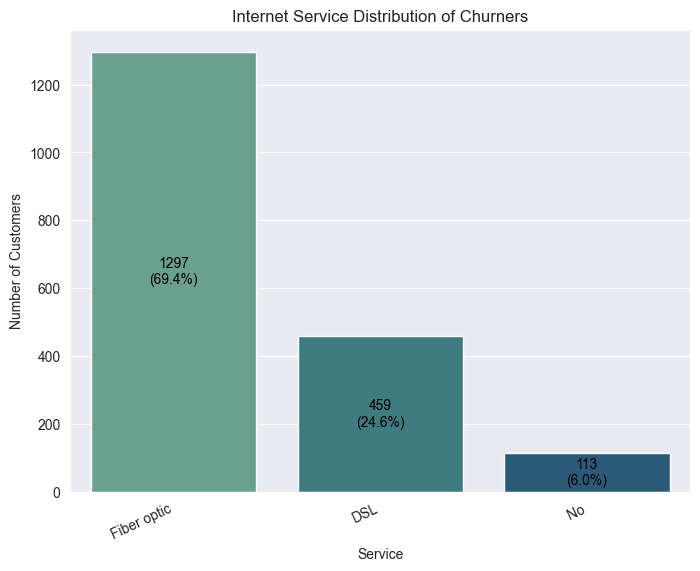

In [81]:
## Plot the internet service distribution as a barplot

# Create a dataframe for internet service counts
internet_service = [{'Service': 'Fiber optic', 'Number of Customers': 1297, 'Percentage of Customers': 69.4},
                    {'Service': 'DSL', 'Number of Customers': 459, 'Percentage of Customers': 24.6},
                    {'Service': 'No', 'Number of Customers': 113, 'Percentage of Customers': 6.0}]

df_internet_service = pd.DataFrame(internet_service)
df_internet_service

# Set the width,height sizes for the plot
plt.figure(figsize = (8,6))

# Set a style
sns.set_style("darkgrid")

# Plot the barplot
ax = sns.barplot(data = df_internet_service,
                 x = 'Service',
                 y = 'Number of Customers',
                 palette = 'crest',
                 hue = 'Service')

# Adjust the x-axis labels
plt.xticks(rotation= 25, 
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'medium')

# Give a title
plt.title('Internet Service Distribution of Churners')

# Add both customer count and percentage as labels
# Create combined labels for each bar
labels = [f"{c}\n({p}%)" for c, p in zip(df_internet_service['Number of Customers'], df_internet_service['Percentage of Customers'])]

# Add the combined labels to the bars
for container, label in zip(ax.containers, labels):
    ax.bar_label(container, labels=[label], label_type='center', fontsize=10, color='black')
    
# Show the plot
plt.show()

### Phone Service

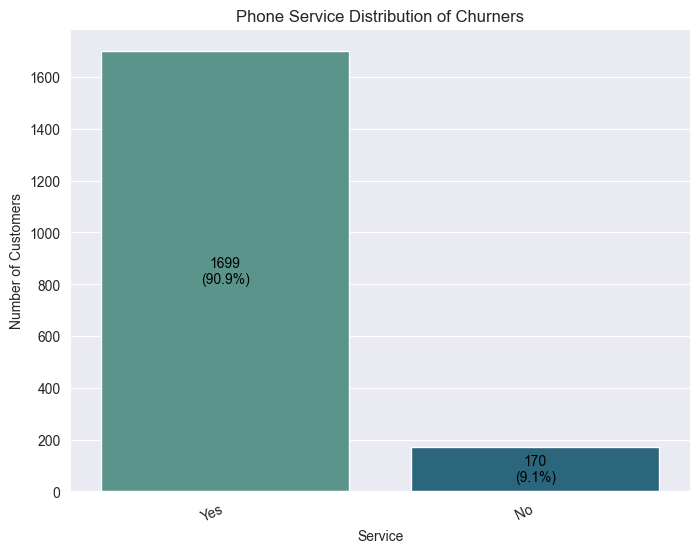

In [82]:
## Plot the internet service distribution as a barplot

# Create a dataframe for internet service counts
phone_service = [
    {'Service': 'Yes', 'Number of Customers': 1699, 'Percentage of Customers': 90.9},
    {'Service': 'No', 'Number of Customers': 170, 'Percentage of Customers': 9.1}]

df_phone_service = pd.DataFrame(phone_service)
df_phone_service

# Set the width,height sizes for the plot
plt.figure(figsize = (8,6))

# Set a style
sns.set_style("darkgrid")

# Plot the barplot
ax = sns.barplot(data = df_phone_service,
                 x = 'Service',
                 y = 'Number of Customers',
                 palette = 'crest',
                 hue = 'Service')

# Adjust the x-axis labels
plt.xticks(rotation= 25, 
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'medium')

# Give a title
plt.title('Phone Service Distribution of Churners')

# Add both customer count and percentage as labels
# Create combined labels for each bar
labels = [f"{c}\n({p}%)" for c, p in zip(df_phone_service['Number of Customers'], df_phone_service['Percentage of Customers'])]

# Add the combined labels to the bars
for container, label in zip(ax.containers, labels):
    ax.bar_label(container, labels=[label], label_type='center', fontsize=10, color='black')
    
# Show the plot
plt.show()

# Feature Engingeering

In [30]:
## All code for the FE

# Initalise the scalers
minmax = MinMaxScaler()
scaler = StandardScaler()

# Custom function for handling blank 'Total Charges'
def total_charges_null(row):

    if (row['Total Charges'].strip() == ""):
        row['Total Charges'] = row['Monthly Charges'] * row['Tenure Months']

    return row

# Custom function for the fe:
def fe(df, is_train: bool):
    
    # Create a copy of the dataframe
    df = df.copy()
    
    # Remove unnessary columns
    cols_to_remove = ['CustomerID', 'Count', 'Country', 'State', 'Zip Code', 'Lat Long', 
                      'Latitude', 'Longitude', 'Churn Label', 'Churn Reason', 'City']
    df.drop(columns = cols_to_remove, inplace = True)
    
    binary_columns = ['Gender',
                      'Senior Citizen', 
                      'Partner', 
                      'Dependents', 
                      'Phone Service', 
                      'Paperless Billing']

    binary_mappings = {'Male': 0,
                       'Female': 1,
                       'Yes': 1, 
                       'No': 0,
                       'True': 1, 
                       'False': 0,
                       0: 0,
                       1: 1}

    df[binary_columns] = df[binary_columns].replace(binary_mappings)

    # One-hot encoding the other non-numerical columns
    OHE_cols = ['Multiple Lines', 'Internet Service', 'Online Security',
                'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
                'Streaming Movies', 'Contract', 'Payment Method']

    df =  pd.get_dummies(data = df, columns =  OHE_cols, dtype = int, drop_first = True)

    # Account for null values in total charges
    df = df.apply(total_charges_null, axis = 1)

    # Change datatype
    df['Total Charges'] = df['Total Charges'].astype(float)

    # Scaling based on distribution
    # Standard for the two normal distributions with no outliers
    standard_cols = ['Tenure Months', 'Monthly Charges']
    minmax_cols = ['Total Charges']
    
    # Fit the scaler on train data only
    if is_train:
        minmax.fit(df[minmax_cols])
        scaler.fit(df[standard_cols])
    
    # Transform the data according to the scaler
    df[minmax_cols] = minmax.transform(df[minmax_cols])
    df[standard_cols] = scaler.transform(df[standard_cols])


   # Return the df
    return df

In [31]:
## Transform the X train and test data with the feature engineering

X_train_fe = fe(X_train, True)
X_test_fe = fe(X_test, False)

C:\Users\BRTechArt\AppData\Local\Temp\ipykernel_88396\1730244340.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace(binary_mappings)
C:\Users\BRTechArt\AppData\Local\Temp\ipykernel_88396\1730244340.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace(binary_mappings)


# Modelling: Logistic Regression

## Train

In [32]:
## Create empty model object and fit the train data

# Empty model
lr = LogisticRegression(C= .1, solver= 'lbfgs', max_iter= 300, random_state= 0)

# Fit train data
lr.fit(X_train_fe, y_train)

LogisticRegression(C=0.1, max_iter=300, random_state=0)

In [33]:
## Store the probabilities into their own features

X_train_fe[["prob_churned", "prob_not_churned"]] = lr.predict_proba(X_train_fe)

# Preview the first few records

X_train_fe.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,prob_churned,prob_not_churned
3717,0,0,0,1,0.363266,1,0,0.193982,0.333289,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0.984224,0.015776
6143,0,0,0,0,1.016103,1,0,-1.515002,0.126008,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0.989231,0.010769
5643,1,0,1,0,0.404069,1,1,0.715987,0.429457,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0.679220,0.320780
69,0,0,1,0,-1.105616,1,1,0.699362,0.046184,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0.331978,0.668022
2863,1,0,1,0,1.424126,1,0,0.042700,0.497749,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0.979671,0.020329


In [34]:
## Established baseline (cutoff)
# 48%

X_train_fe["y_pred"] = np.where(X_train_fe["prob_not_churned"] >= .48, 1, 0)

### Evaluation

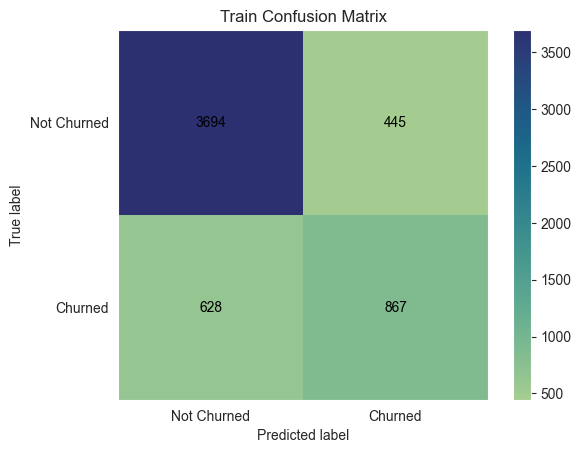

In [35]:
## Confusion matrix visualisation

cm_train = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_train, X_train_fe["y_pred"]),
                                    display_labels= ["Not Churned", "Churned"])

# Iterate through text elements and set color
for text in cm_train.plot(values_format='d', cmap='crest').text_.flatten():
    text.set_color('black') 

# Customise the plot
plt.title('Train Confusion Matrix')
plt.grid(False)
plt.show()

In [36]:
## Custom function to 

def get_results(actual, predicted):
    print(f'The Train Accuracy of our model is: {round(metrics.accuracy_score(actual, predicted),4)*100}%')
    print(f'The Train Precision of our model is: {round(metrics.precision_score(actual, predicted),4)*100}%')
    print(f'The Train Recall of our model is: {round(metrics.recall_score(actual, predicted),4)*100}%')
    print(f'The Train F1-score of our model is: {round(metrics.f1_score(actual, predicted),4)*100}%')

get_results(y_train, X_train_fe["y_pred"])

The Train Accuracy of our model is: 80.95%
The Train Precision of our model is: 66.08000000000001%
The Train Recall of our model is: 57.989999999999995%
The Train F1-score of our model is: 61.77%


## Test

In [37]:
## Store the probabilities into their own features

X_test_fe[["prob_churned", "prob_not_churned"]] = lr.predict_proba(X_test_fe)

# Preview the first few records

X_test_fe.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,prob_churned,prob_not_churned
5947,1,0,0,0,-0.044756,1,0,-1.445180,0.079374,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0.969650,0.030350
5687,0,0,1,1,-1.146418,1,0,-0.650536,0.019534,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.795905,0.204095
1861,1,1,1,0,-1.268825,1,1,0.335289,0.008572,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.178647,0.821353
1717,1,0,1,0,1.056905,1,1,0.965352,0.625875,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.759682,0.240318
6272,1,0,1,0,1.016103,1,0,0.340276,0.503057,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0.944225,0.055775


In [38]:
## Established baseline (cutoff)
# 50%

X_test_fe["y_pred"] = np.where(X_test_fe["prob_not_churned"] >= .48, 1, 0)

### Evaluation

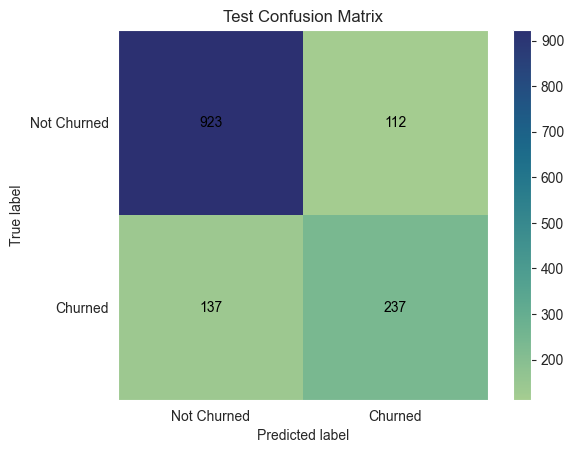

In [39]:
## Confusion matrix visualisation

cm_train = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, X_test_fe["y_pred"]),
                                    display_labels= ["Not Churned", "Churned"])

# Iterate through text elements and set color
for text in cm_train.plot(values_format='d', cmap='crest').text_.flatten():
    text.set_color('black') 

# Customise the plot
plt.title('Test Confusion Matrix')
plt.grid(False)
plt.show()

In [40]:
## Custom function to 

def get_results(actual, predicted):
    print(f'The Test Accuracy of our model is: {round(metrics.accuracy_score(actual, predicted),4)*100}%')
    print(f'The Test Precision of our model is: {round(metrics.precision_score(actual, predicted),4)*100}%')
    print(f'The Test Recall of our model is: {round(metrics.recall_score(actual, predicted),4)*100}%')
    print(f'The Test F1-score of our model is: {round(metrics.f1_score(actual, predicted),4)*100}%')

get_results(y_test, X_test_fe["y_pred"])

The Test Accuracy of our model is: 82.33%
The Test Precision of our model is: 67.91%
The Test Recall of our model is: 63.370000000000005%
The Test F1-score of our model is: 65.56%


## ROC & AUC

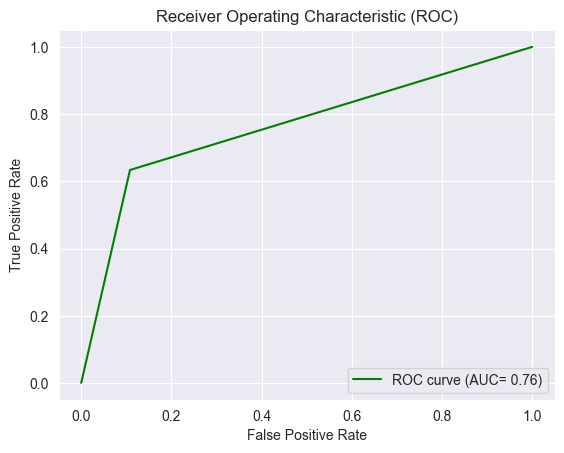

In [105]:
## ROC & AUC

# Calculate ROC curve and AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, X_test_fe["y_pred"])
auc = metrics.roc_auc_score(y_test, X_test_fe["y_pred"])

# Plot the ROC curve
plt.plot(fpr, tpr, color= "green", label='ROC curve (AUC= %.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc= "lower right")

plt.show()

# Feature Importance

In [42]:
## Create a list of column names/features in the model

fe_cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Paperless Billing', 'Monthly Charges',
       'Total Charges', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Online Security_No internet service',
       'Online Security_Yes', 'Online Backup_No internet service',
       'Online Backup_Yes', 'Device Protection_No internet service',
       'Device Protection_Yes', 'Tech Support_No internet service',
       'Tech Support_Yes', 'Streaming TV_No internet service',
       'Streaming TV_Yes', 'Streaming Movies_No internet service',
       'Streaming Movies_Yes', 'Contract_One year', 'Contract_Two year',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check']

In [43]:
## Insights on the feature's coefficients, odds ratio and log odds (percentage change in odds)

# Create a variable to store the logisitic model's coefficient for each feature
coefficients = lr.coef_[0]

# Calculate the odds ratio from each coefficient
odds_ratios = np.exp(coefficients)

# Calculate the relative odds change as a percentage using the log odds of the feature
percent = ((odds_ratios - 1)*100).round(1)

# Display as a dataframe
feature_importance = pd.DataFrame({
    'Feature': fe_cols,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios,
    'Relative Change in Odds (%)': percent})

# Order by descending coefficient
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Display
print("\nFeature Importance:")
feature_importance


Feature Importance:


,Feature,Coefficient,Odds Ratio,Relative Change in Odds (%)
11,Internet Service_Fiber optic,0.561244,1.752853,75.3
8,Total Charges,0.391464,1.479145,47.9
6,Paperless Billing,0.327956,1.388129,38.8
28,Payment Method_Electronic check,0.310791,1.364504,36.5
9,Multiple Lines_No phone service,0.266877,1.305880,30.6
7,Monthly Charges,0.229911,1.258488,25.8
10,Multiple Lines_Yes,0.225410,1.252836,25.3
2,Partner,0.192428,1.212189,21.2
22,Streaming TV_Yes,0.157953,1.171112,17.1
24,Streaming Movies_Yes,0.129324,1.138059,13.8


Explaination of the outputs:
- Coefficient:
  - If a coefficient is positive, the feature increases the likelihood of churning (positive class)
  - If a coefficient is negative, the feature reduces the likelihood of the customer churning.
  - Regarding the one-hot encoded features, the baseline category (dropped during OHE) is the reference point for comparison. E.g., Internet Service_Fiber optic is more important than DSL.
- Odds Ratio: more intuitive by describing how much the odds change when a feature increases by one unit.
  - Odds ratio > 1: The feature increases the odds of churning.
  - Odds ratio < 1: The feature decreases the odds of churning.
  - Odds ratio = 1: The feature has no effect on the odds.
  - E.g., Odds ratio of 1.75 means the feature increases the odds of churning by 1.75 times
- Relative change in odds (%): determines how far the odds have changed relative to the baseline of 1, as a percentage.
  - E.g., 75.5% means a customer who has fibre optics for internet service increases the odds of that customer churning by 75.5% (compared to DSL).

Sources?
  - [Link](https://dadataguy.medium.com/logistic-regression-using-statsmodels-a63e7944de76)
  - [Link 2](https://www.geeksforgeeks.org/understanding-feature-importance-in-logistic-regression-models/#2-odds-ratios)

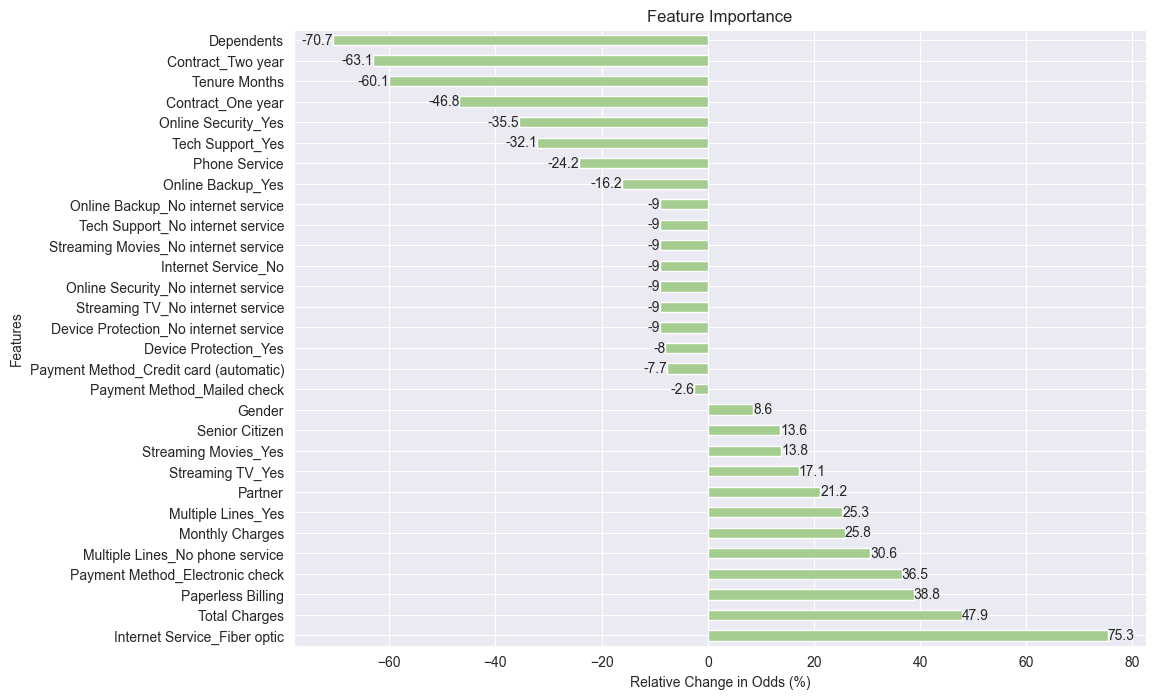

In [44]:
# Plot the feature importance as a barplot
ax = feature_importance.plot(x='Feature', 
                             y='Relative Change in Odds (%)', 
                             kind='barh', 
                             figsize=(11, 8), 
                             colormap= 'crest')

# Remove the legend
ax.legend().set_visible(False)

# Customise the labels and title
ax.set_xlabel('Relative Change in Odds (%)')
ax.set_ylabel('Features')
ax.set_title('Feature Importance')

# Plot the percentage as annotations
for i in ax.containers:
    ax.bar_label(i)

# Show the plot
plt.show()

## Other Feature Importance (Not Important)

In [45]:
## Feature Importance (Coefficient and Odds Ratio)

# Coefficients and Odds Ratios
coefficients = lr.coef_[0]
odds_ratios = np.exp(coefficients)

# Display feature importance using coefficients and odds ratios
feature_importance = pd.DataFrame({
    'Feature': X_train_fe[fe_cols].columns,
    'Coefficient': np.abs(coefficients),
    'Odds Ratio': odds_ratios})

print("Feature Importance (Coefficient and Odds Ratio):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))

Feature Importance (Coefficient and Odds Ratio):
                                   Feature  Coefficient  Odds Ratio
3                               Dependents     1.226646    0.293275
26                       Contract_Two year     0.995842    0.369412
4                            Tenure Months     0.919664    0.398653
25                       Contract_One year     0.630843    0.532143
11            Internet Service_Fiber optic     0.561244    1.752853
14                     Online Security_Yes     0.438379    0.645081
8                            Total Charges     0.391464    1.479145
20                        Tech Support_Yes     0.387643    0.678655
6                        Paperless Billing     0.327956    1.388129
28         Payment Method_Electronic check     0.310791    1.364504
5                            Phone Service     0.277524    0.757658
9          Multiple Lines_No phone service     0.266877    1.305880
7                          Monthly Charges     0.229911    1.258488

# Prediction of Customer's Churn Risk

## Top 500 Customers Most Likely to Churn

In [46]:
## Model to use

lr

LogisticRegression(C=0.1, max_iter=300, random_state=0)

In [47]:
## Obtain a list of the non-churned customers

not_churned = customers[customers['Churn Value'] == 0].copy()
not_churned.shape # 5174 out of total 7043 customers

(5174, 31)

In [48]:
## Remove the 'Churn Value'

not_churned_fe = not_churned.drop(['Churn Value'], axis = 1)
not_churned_fe.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Reason
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NaN
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,NaN
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,NaN
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,NaN
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,NaN


In [49]:
## Feature engineer the dataset

not_churned_fe = fe(not_churned_fe, is_train = False)

C:\Users\BRTechArt\AppData\Local\Temp\ipykernel_88396\1730244340.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace(binary_mappings)


In [50]:
## Predict the probability of the classes

not_churned_fe[["prob_churned", "prob_not_churned"]] = lr.predict_proba(not_churned_fe) 

In [51]:
## Display the first few rows

not_churned_fe.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,prob_churned,prob_not_churned
1869,1,0,1,0,-1.268825,0,1,-1.147604,0.003437,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.346131,0.653869
1870,0,0,0,0,0.077650,1,0,-0.246564,0.217564,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0.941136,0.058864
1871,0,0,0,0,0.526475,0,0,-0.733657,0.211951,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0.957522,0.042478
1872,0,0,0,1,-0.411977,1,1,0.822383,0.224461,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0.751246,0.248754
1873,1,0,0,0,-0.901604,0,0,-1.150929,0.034762,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.692032,0.307968


In [52]:
## Create a dataframe of the top 500 most likely customers to churn

top_500 = not_churned_fe.sort_values(by = 'prob_not_churned', ascending = False).head(500)

In [53]:
## Display the bottom 5 rows

top_500.tail(5)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_Fiber optic,Internet Service_No,Online Security_No internet service,Online Security_Yes,Online Backup_No internet service,Online Backup_Yes,Device Protection_No internet service,Device Protection_Yes,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,prob_churned,prob_not_churned
6025,1,0,0,0,-1.268825,1,1,-0.524190,0.005596,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.489142,0.510858
3293,0,0,1,1,-1.268825,1,1,0.554730,0.009332,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.489173,0.510827
4523,1,0,0,0,-0.942407,0,0,-0.785193,0.041383,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0.489249,0.510751
3343,1,1,0,0,-0.942407,1,0,0.370200,0.073393,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.490351,0.509649
6169,1,0,0,0,-0.779198,1,1,0.478258,0.114608,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0.491456,0.508544


In [54]:
## Add the customerID back to the dataframe

top_500['CustomerID'] = customers['CustomerID'][customers['CustomerID'].index.isin(top_500.index)]

In [55]:
## Add a rank columns for top 500

top_500.reset_index(inplace = True) # Reset the index
top_500['Rank'] = top_500.index + 1 

In [56]:
## Remove unneeded columns

cols_to_keep = ['Rank', 'CustomerID']
top_500_complete = top_500[cols_to_keep]

In [57]:
## Display the first 5 rows 

print(top_500_complete.shape)
top_500_complete.head(5)

(500, 2)


,Rank,CustomerID
0,1,6630-UJZMY
1,2,5150-ITWWB
2,3,3489-HHPFY
3,4,2545-EBUPK
4,5,4927-WWOOZ


In [58]:
## Export the dataframe as a csv

top_500_complete.to_csv("Top_500_Customer_Guardians.csv", index=False)

## Full Churn Risk of Remaining Customers

In [59]:
## Make a copy of the dataset

remaining_churn_risk = not_churned_fe.copy()

In [60]:
## Add the CustomerID to the full unchurned customers list

remaining_churn_risk['CustomerID'] = customers['CustomerID'][customers['CustomerID'].index.isin(remaining_churn_risk.index)]

In [61]:
## Remove customers already included in top 500

# Create a list of IDs from top 500
top_500_ID = list(top_500_complete['CustomerID'])

# Remove those ID 
remaining_churn_risk = remaining_churn_risk[~remaining_churn_risk['CustomerID'].isin(top_500_ID)] # ~ means not/negation

In [62]:
## Check they have been removed

remaining_churn_risk.shape

(4674, 33)

In [63]:
## Sort by descending churn risk

remaining_churn_risk = remaining_churn_risk.sort_values(by = 'prob_not_churned', ascending = False)

In [64]:
## Remove unneeded columns and rename prob_1

cols_to_keep = ['CustomerID', 'prob_not_churned']
remaining_churn_risk = remaining_churn_risk[cols_to_keep]

remaining_churn_risk_complete = remaining_churn_risk.rename(columns = {'prob_not_churned': 'ChurningProbability'})
remaining_churn_risk_complete.head()

,CustomerID,ChurningProbability
6770,2832-KJCRD,0.508326
6537,6048-QBXKL,0.507889
2828,6729-GDNGC,0.507781
1904,8012-SOUDQ,0.507191
4441,7339-POGZN,0.507145


In [65]:
## Add another column with our model's prediction (>0.48 as the cutoff)

remaining_churn_risk_complete['ModelChurningPrediction'] = remaining_churn_risk_complete['ChurningProbability'].apply(
    lambda x: 1 if x >= 0.48 else 0) # 0: Not likely to churn, 1: Likely to churn

In [66]:
## Display the last five rows

remaining_churn_risk_complete.tail()

,CustomerID,ChurningProbability,ModelChurningPrediction
3591,4277-BWBML,0.002429,0
2264,1403-GYAFU,0.002422,0
6730,4086-WITJG,0.002320,0
2520,1764-VUUMT,0.002310,0
3736,0784-ZQJZX,0.001867,0


In [67]:
## Export the dataframe as a csv

remaining_churn_risk_complete.to_csv("Churn_risk_Customer_Guardians.csv", index=False)